<a href="https://colab.research.google.com/github/Erenkardogan/SmiLe/blob/main/LSTM(Derin_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ilk olarak drive'i bagladik
from google.colab import drive
drive.mount('/content/drive')
#tüm fotolar 64*64 boyutunda burda

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
import matplotlib.pyplot as plt


In [ ]:
# Veri yolları
positive_path = '/content/drive/MyDrive/datasetSm/SMILEs/positives/positives7'
negative_path = '/content/drive/MyDrive/datasetSm/SMILEs/negatives/negatives7'

# Veriyi yükleme ve ön işleme fonksiyonu
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = img.reshape(64, 64, 1)  # Gerekli şekle dönüştürme
            images.append(img)
            labels.append(label)
    return images, labels


In [ ]:
# Pozitif ve negatif resimleri yükleyin
pos_images, pos_labels = load_images_from_folder(positive_path, 1)
neg_images, neg_labels = load_images_from_folder(negative_path, 0)

# Veriyi birleştirin
images = np.array(pos_images + neg_images)
labels = np.array(pos_labels + neg_labels)

# Veriyi normalleştirin
images = images / 255.0

# Etiketleri one-hot encode yapın
labels = to_categorical(labels, num_classes=2)

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# LSTM modelini oluşturun
model = Sequential()
model.add(LSTM(64, input_shape=(64, 64), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64, 64)            33024     
                                                                 
 dropout (Dropout)           (None, 64, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 64, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64, 64)            3

In [ ]:
# Modeli derleyin
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitin
H = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Test seti üzerinde tahmin yapın
predictions = model.predict(X_test)


Epoch 1/10
264/264 [==============================] - 69s 217ms/step - loss: 0.5564 - accuracy: 0.7415 - val_loss: 0.5356 - val_accuracy: 0.7456
Epoch 2/10
264/264 [==============================] - 50s 191ms/step - loss: 0.4052 - accuracy: 0.8195 - val_loss: 0.3580 - val_accuracy: 0.8505
Epoch 3/10
264/264 [==============================] - 54s 203ms/step - loss: 0.3663 - accuracy: 0.8412 - val_loss: 0.3758 - val_accuracy: 0.8443
Epoch 4/10
264/264 [==============================] - 52s 198ms/step - loss: 0.3581 - accuracy: 0.8444 - val_loss: 0.3240 - val_accuracy: 0.8695
Epoch 5/10
264/264 [==============================] - 54s 203ms/step - loss: 0.3346 - accuracy: 0.8605 - val_loss: 0.3226 - val_accuracy: 0.8700
Epoch 6/10
264/264 [==============================] - 50s 191ms/step - loss: 0.3199 - accuracy: 0.8685 - val_loss: 0.3117 - val_accuracy: 0.8728
Epoch 7/10
264/264 [==============================] - 52s 198ms/step - loss: 0.3055 - accuracy: 0.8747 - val_loss: 0.3268 - val_ac

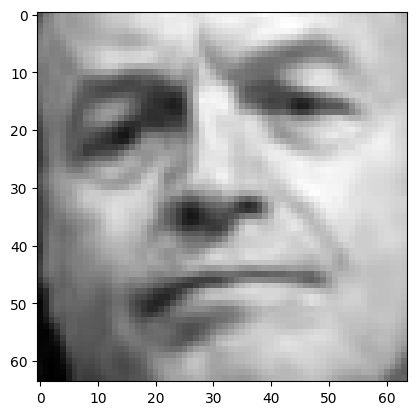

Görüntü boyutları (yükseklik, genişlik, kanal sayısı): (13165, 64, 64, 1)
guess:  1
%:  [18 82]


In [ ]:
# Görselleştirme
image = (X_test[40].reshape(64, 64) * 255).astype(np.uint8)
plt.imshow(image, cmap='gray')  # 'gray' parametresi gri tonlamalı görüntüler içindir
plt.show()
print(f"Görüntü boyutları (yükseklik, genişlik, kanal sayısı): {images.shape}")

preds = predictions[30]
guess = np.argmax(preds)
perc = np.rint(preds * 100).astype(int)

print('guess: ', guess)
print('%: ', perc)

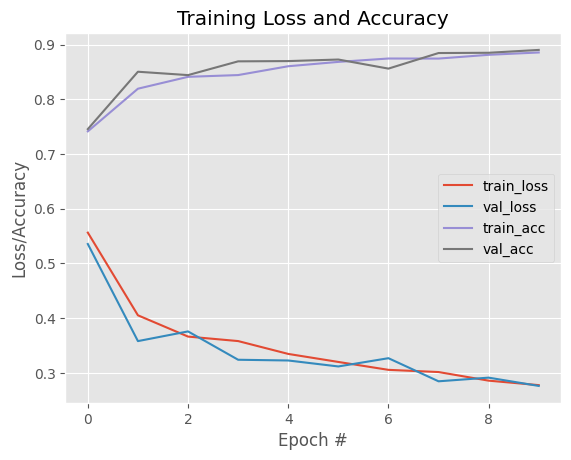

In [ ]:
# Eğitim sürecini görselleştirme
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()